In [1]:

import pandas as pd
import numpy as np
import os
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, TimeDistributed,CuDNNLSTM,BatchNormalization,Flatten,Dropout,CuDNNGRU,MaxPooling1D,Conv1D,GlobalMaxPooling1D,Bidirectional
from keras.layers import Input,concatenate,ReLU,Add

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.models import load_model
import keras

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import time
from imageloader import data_process
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import copy

Using TensorFlow backend.


In [44]:
MODEL_SAVE_FOLDER_PATH = './model/lstm'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)


early_stopping = EarlyStopping()

scaler = MinMaxScaler((0,100))


dp_train = data_process('./DATA/aug/all/train')
dp_test = data_process('./DATA/aug/all/test')

dp_train.point_data_load()
dp_train.image_make()
dp_train.sequence_50()

dp_test.point_data_load()
dp_test.image_make()
dp_test.sequence_50()
#dp.image_read()



X_train = dp_train.point
X_test = dp_test.point

X_train_img = dp_train.images
X_test_img = dp_test.images
Y_train = dp_train.label
Y_test = dp_test.label

print("asd",X_train.shape)

'''
dp = data_process('./DATA/test')
dp.point_data_load()
dp.image_make()
dp.sequence_50()
#dp.image_read()
dp.data_shuffle()



size = int(np.size(dp.point,0) * 0.1)
X_train = dp.point[:size]
#X_train = copy.deepcopy(dp.point)
X_test = dp.point[size:]

X_train_img = dp.images[:size]
X_test_img = dp.images[size:]
Y_train = dp.label[:size]
Y_test = dp.label[size:]
'''
Y_train_ = keras.utils.to_categorical(Y_train,num_classes=10, dtype='float32')
Y_test_ = keras.utils.to_categorical(Y_test,num_classes=10, dtype='float32')



for i in range(np.size(X_train,0)):
  X_train[i] = scaler.fit_transform(X_train[i])
'''
  for j in range(np.size(X_train[i],0)):
    X_train[i][j][0] -= np.mean(X_train[i], axis=0)[0]
    X_train[i][j][1] -= np.mean(X_train[i], axis=0)[1]
    X_train[i][j][0] /= np.std(X_train[i],axis=0)[0]
    X_train[i][j][1] /= np.std(X_train[i],axis=0)[1]
''' 
for i in range(np.size(X_test,0)):
  X_test[i] = scaler.fit_transform(X_test[i])
'''
  for j in range(np.size(X_test[i],0)):
    X_test[i][j][0] -= np.mean(X_test[i], axis=0)[0]
    X_test[i][j][1] -= np.mean(X_test[i], axis=0)[1]
    X_test[i][j][0] /= np.std(X_test[i],axis=0)[0]
    X_test[i][j][1] /= np.std(X_test[i],axis=0)[1]
'''

--- 8.703060865402222 seconds ---
0
--- 1.8150997161865234 seconds ---
4
asd (5400, 50, 2)


/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib

/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib

/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib

/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib

/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib

/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kist-student/anaconda3/envs/tensor/lib

'\n  for j in range(np.size(X_test[i],0)):\n    X_test[i][j][0] -= np.mean(X_test[i], axis=0)[0]\n    X_test[i][j][1] -= np.mean(X_test[i], axis=0)[1]\n    X_test[i][j][0] /= np.std(X_test[i],axis=0)[0]\n    X_test[i][j][1] /= np.std(X_test[i],axis=0)[1]\n'

In [37]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)


In [45]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding="valid",input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.45))

model.add(Conv2D(64, kernel_size=3, padding="valid"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Dropout(0.45))

model.add(Conv2D(128, kernel_size=3, padding="valid"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Dropout(0.45))

model.add(Conv2D(256, kernel_size=3, padding="valid"))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Dropout(0.45))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.45))

model.add(Dense(10,activation='softmax'))


In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 11, 11, 64)        256       
__________

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_1 = model.fit(X_train_img, Y_train_,
                batch_size=64,
                validation_data=(X_test_img,Y_test_),
                epochs=200,
                verbose=1,
                callbacks=[cb_checkpoint])





Train on 5400 samples, validate on 1200 samples
Epoch 1/200
5400/5400 [==============================] - 4s 685us/step - loss: 1.6375 - acc: 0.4461 - val_loss: 2.5166 - val_acc: 0.3233

Epoch 00001: val_loss improved from inf to 2.51658, saving model to ./model/lstm.hdf5
Epoch 2/200
5400/5400 [==============================] - 1s 210us/step - loss: 0.6729 - acc: 0.7594 - val_loss: 2.5720 - val_acc: 0.4492

Epoch 00002: val_loss did not improve from 2.51658
Epoch 3/200
5400/5400 [==============================] - 1s 249us/step - loss: 0.3689 - acc: 0.8767 - val_loss: 1.6829 - val_acc: 0.5650

Epoch 00003: val_loss improved from 2.51658 to 1.68288, saving model to ./model/lstm.hdf5
Epoch 4/200
5400/5400 [==============================] - 1s 154us/step - loss: 0.2591 - acc: 0.9111 - val_loss: 1.2784 - val_acc: 0.6792

Epoch 00004: val_loss improved from 1.68288 to 1.27839, saving model to ./model/lstm.hdf5
Epoch 5/200
5400/5400 [==============================] - 1s 229us/step - loss: 0.19

5400/5400 [==============================] - 1s 179us/step - loss: 0.0223 - acc: 0.9922 - val_loss: 0.0386 - val_acc: 0.9883

Epoch 00041: val_loss did not improve from 0.01694
Epoch 42/200
5400/5400 [==============================] - 1s 235us/step - loss: 0.0227 - acc: 0.9931 - val_loss: 0.0318 - val_acc: 0.9867

Epoch 00042: val_loss did not improve from 0.01694
Epoch 43/200
5400/5400 [==============================] - 1s 128us/step - loss: 0.0216 - acc: 0.9928 - val_loss: 0.0543 - val_acc: 0.9867

Epoch 00043: val_loss did not improve from 0.01694
Epoch 44/200
5400/5400 [==============================] - 1s 189us/step - loss: 0.0314 - acc: 0.9902 - val_loss: 0.0482 - val_acc: 0.9858

Epoch 00044: val_loss did not improve from 0.01694
Epoch 45/200
5400/5400 [==============================] - 1s 254us/step - loss: 0.0344 - acc: 0.9887 - val_loss: 0.0317 - val_acc: 0.9900

Epoch 00045: val_loss did not improve from 0.01694
Epoch 46/200
5400/5400 [==============================] - 1s 20

5400/5400 [==============================] - 1s 163us/step - loss: 0.0128 - acc: 0.9957 - val_loss: 0.0264 - val_acc: 0.9958

Epoch 00084: val_loss did not improve from 0.01500
Epoch 85/200
5400/5400 [==============================] - 1s 200us/step - loss: 0.0142 - acc: 0.9952 - val_loss: 0.0358 - val_acc: 0.9933

Epoch 00085: val_loss did not improve from 0.01500
Epoch 86/200
5400/5400 [==============================] - 1s 130us/step - loss: 0.0088 - acc: 0.9967 - val_loss: 0.0285 - val_acc: 0.9958

Epoch 00086: val_loss did not improve from 0.01500
Epoch 87/200
5400/5400 [==============================] - 1s 154us/step - loss: 0.0127 - acc: 0.9957 - val_loss: 0.0324 - val_acc: 0.9933

Epoch 00087: val_loss did not improve from 0.01500
Epoch 88/200
5400/5400 [==============================] - 1s 115us/step - loss: 0.0153 - acc: 0.9944 - val_loss: 0.0158 - val_acc: 0.9967

Epoch 00088: val_loss did not improve from 0.01500
Epoch 89/200
5400/5400 [==============================] - 1s 12

5400/5400 [==============================] - 1s 153us/step - loss: 0.0168 - acc: 0.9965 - val_loss: 0.0246 - val_acc: 0.9950

Epoch 00127: val_loss did not improve from 0.00874
Epoch 128/200
5400/5400 [==============================] - 1s 199us/step - loss: 0.0093 - acc: 0.9972 - val_loss: 0.0493 - val_acc: 0.9892

Epoch 00128: val_loss did not improve from 0.00874
Epoch 129/200
5400/5400 [==============================] - 1s 239us/step - loss: 0.0238 - acc: 0.9946 - val_loss: 0.0235 - val_acc: 0.9933

Epoch 00129: val_loss did not improve from 0.00874
Epoch 130/200
5400/5400 [==============================] - 1s 233us/step - loss: 0.0131 - acc: 0.9954 - val_loss: 0.0092 - val_acc: 0.9975

Epoch 00130: val_loss did not improve from 0.00874
Epoch 131/200
5400/5400 [==============================] - 1s 256us/step - loss: 0.0080 - acc: 0.9974 - val_loss: 0.0200 - val_acc: 0.9942

Epoch 00131: val_loss did not improve from 0.00874
Epoch 132/200
5400/5400 [==============================] - 

5400/5400 [==============================] - 1s 241us/step - loss: 0.0063 - acc: 0.9985 - val_loss: 0.0175 - val_acc: 0.9950

Epoch 00170: val_loss did not improve from 0.00874
Epoch 171/200
5400/5400 [==============================] - 1s 160us/step - loss: 0.0065 - acc: 0.9976 - val_loss: 0.0347 - val_acc: 0.9925

Epoch 00171: val_loss did not improve from 0.00874
Epoch 172/200
5400/5400 [==============================] - 1s 179us/step - loss: 0.0105 - acc: 0.9978 - val_loss: 0.0255 - val_acc: 0.9933

Epoch 00172: val_loss did not improve from 0.00874
Epoch 173/200
5400/5400 [==============================] - 1s 207us/step - loss: 0.0087 - acc: 0.9972 - val_loss: 0.0115 - val_acc: 0.9958

Epoch 00173: val_loss did not improve from 0.00874
Epoch 174/200
5400/5400 [==============================] - 1s 256us/step - loss: 0.0110 - acc: 0.9980 - val_loss: 0.0275 - val_acc: 0.9917

Epoch 00174: val_loss did not improve from 0.00874
Epoch 175/200
5400/5400 [==============================] - 

In [48]:
input_1 = Input(shape=(28, 28, 1))

x_1 = Conv2D(32, kernel_size=3, padding="same", activation = 'relu')(input_1)
x_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x_1)
x_1 = Dropout(0.3)(x_1)

x_1 = Conv2D(64, kernel_size=3, padding="same", activation = 'relu')(x_1)
x_1 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x_1)
x_1 = Dropout(0.3)(x_1)

x_1 = Conv2D(128, kernel_size=3, padding="same", activation = 'relu')(x_1)
x_1 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x_1)

x_1 = Conv2D(256, kernel_size=3, padding="same", activation = 'relu')(x_1)
x_1 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x_1)

x_1 = Dropout(0.3)(x_1)

x_1 = Flatten()(x_1)
x_1 = Dense(units=512, activation='relu')(x_1)


input_2 = Input(shape=(None, 2))

x_2 = Bidirectional(CuDNNLSTM(128,return_sequences=True))(input_2)
x_2 = Dropout(0.3)(x_2)
x_2 = Bidirectional(CuDNNLSTM(128,return_sequences=True))(x_2)
x_2 = Dropout(0.3)(x_2)
x_2 = CuDNNLSTM(128)(x_2)



merged = concatenate([x_1,x_2])
m = Dense(256, activation='relu')(merged)

m = Dense(10, activation='softmax')(m)

model = Model(inputs=[input_1, input_2], outputs = m)


In [49]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 28, 28, 32)   320         input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_33 (MaxPooling2D) (None, 14, 14, 32)   0           conv2d_33[0][0]                  
__________________________________________________________________________________________________
dropout_45 (Dropout)            (None, 14, 14, 32)   0           max_pooling2d_33[0][0]           
__________________________________________________________________________________________________
conv2d_34 

In [50]:
model.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])
hist_2 = model.fit([X_train_img,X_train],Y_train_,epochs=200,batch_size=64,validation_data=([X_test_img,X_test],Y_test_),callbacks=[cb_checkpoint])


score = model.evaluate([X_test_img,X_test],Y_test_)
scores = model.predict([X_test_img,X_test])
true_value = np.argmax(Y_test_,1)
predict_value = np.argmax(scores,1)
list_ = []
for i in range(np.size(true_value,0)):
  if(true_value[i] != predict_value[i]):
    print('t:{},p:{}'.format(true_value[i],predict_value[i]))
    list_.append(i)

Train on 5400 samples, validate on 1200 samples
Epoch 1/200
5400/5400 [==============================] - 7s 1ms/step - loss: 1.1873 - acc: 0.6417 - val_loss: 0.3755 - val_acc: 0.9408

Epoch 00001: val_loss did not improve from 0.00874
Epoch 2/200
5400/5400 [==============================] - 3s 479us/step - loss: 0.1923 - acc: 0.9491 - val_loss: 0.1104 - val_acc: 0.9783

Epoch 00002: val_loss did not improve from 0.00874
Epoch 3/200
5400/5400 [==============================] - 3s 477us/step - loss: 0.0770 - acc: 0.9819 - val_loss: 0.0606 - val_acc: 0.9900

Epoch 00003: val_loss did not improve from 0.00874
Epoch 4/200
5400/5400 [==============================] - 3s 481us/step - loss: 0.0372 - acc: 0.9919 - val_loss: 0.0430 - val_acc: 0.9942

Epoch 00004: val_loss did not improve from 0.00874
Epoch 5/200
5400/5400 [==============================] - 3s 475us/step - loss: 0.0193 - acc: 0.9965 - val_loss: 0.0322 - val_acc: 0.9933

Epoch 00005: val_loss did not improve from 0.00874
Epoch 6/2

5400/5400 [==============================] - 3s 483us/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0241 - val_acc: 0.9908

Epoch 00043: val_loss did not improve from 0.00874
Epoch 44/200
5400/5400 [==============================] - 3s 483us/step - loss: 0.0121 - acc: 0.9957 - val_loss: 0.0180 - val_acc: 0.9950

Epoch 00044: val_loss did not improve from 0.00874
Epoch 45/200
5400/5400 [==============================] - 3s 473us/step - loss: 6.1575e-04 - acc: 1.0000 - val_loss: 0.0138 - val_acc: 0.9967

Epoch 00045: val_loss did not improve from 0.00874
Epoch 46/200
5400/5400 [==============================] - 3s 475us/step - loss: 6.9407e-04 - acc: 0.9998 - val_loss: 0.0189 - val_acc: 0.9950

Epoch 00046: val_loss did not improve from 0.00874
Epoch 47/200
5400/5400 [==============================] - 3s 487us/step - loss: 0.0072 - acc: 0.9985 - val_loss: 0.0190 - val_acc: 0.9933

Epoch 00047: val_loss did not improve from 0.00874
Epoch 48/200
5400/5400 [==============================]

5400/5400 [==============================] - 3s 487us/step - loss: 1.3263e-05 - acc: 1.0000 - val_loss: 0.0116 - val_acc: 0.9967

Epoch 00085: val_loss did not improve from 0.00810
Epoch 86/200
5400/5400 [==============================] - 3s 474us/step - loss: 1.1374e-05 - acc: 1.0000 - val_loss: 0.0122 - val_acc: 0.9967

Epoch 00086: val_loss did not improve from 0.00810
Epoch 87/200
5400/5400 [==============================] - 3s 474us/step - loss: 1.3344e-05 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 0.9967

Epoch 00087: val_loss did not improve from 0.00810
Epoch 88/200
5400/5400 [==============================] - 3s 483us/step - loss: 8.7155e-06 - acc: 1.0000 - val_loss: 0.0111 - val_acc: 0.9967

Epoch 00088: val_loss did not improve from 0.00810
Epoch 89/200
5400/5400 [==============================] - 3s 482us/step - loss: 9.6693e-06 - acc: 1.0000 - val_loss: 0.0122 - val_acc: 0.9967

Epoch 00089: val_loss did not improve from 0.00810
Epoch 90/200
5400/5400 [===================

5400/5400 [==============================] - 3s 480us/step - loss: 2.2355e-05 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 0.9975

Epoch 00126: val_loss improved from 0.00657 to 0.00622, saving model to ./model/lstm.hdf5
Epoch 127/200
5400/5400 [==============================] - 3s 480us/step - loss: 2.2992e-05 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9967

Epoch 00127: val_loss did not improve from 0.00622
Epoch 128/200
5400/5400 [==============================] - 3s 471us/step - loss: 4.2727e-05 - acc: 1.0000 - val_loss: 0.0102 - val_acc: 0.9950

Epoch 00128: val_loss did not improve from 0.00622
Epoch 129/200
5400/5400 [==============================] - 3s 470us/step - loss: 2.3776e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9975

Epoch 00129: val_loss did not improve from 0.00622
Epoch 130/200
5400/5400 [==============================] - 3s 473us/step - loss: 1.5603e-05 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9975

Epoch 00130: val_loss did not improve from 0.00622


5400/5400 [==============================] - 3s 473us/step - loss: 2.3119e-06 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9967

Epoch 00166: val_loss did not improve from 0.00487
Epoch 167/200
5400/5400 [==============================] - 3s 480us/step - loss: 7.8383e-06 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9975

Epoch 00167: val_loss did not improve from 0.00487
Epoch 168/200
5400/5400 [==============================] - 3s 479us/step - loss: 3.3482e-06 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9967

Epoch 00168: val_loss did not improve from 0.00487
Epoch 169/200
5400/5400 [==============================] - 3s 474us/step - loss: 4.0782e-06 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9967

Epoch 00169: val_loss improved from 0.00487 to 0.00483, saving model to ./model/lstm.hdf5
Epoch 170/200
5400/5400 [==============================] - 3s 475us/step - loss: 2.4278e-06 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 0.9975

Epoch 00170: val_loss did not improve from 0.00483


In [24]:
model = Sequential()

model.add(Bidirectional(CuDNNLSTM(128,return_sequences=True),input_shape=(50, 2)))
model.add(Dropout(0.3))
model.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
model.add(Dropout(0.3))
model.add(CuDNNLSTM(128))

model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 50, 256)           135168    
_________________________________________________________________
dropout_16 (Dropout)         (None, 50, 256)           0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 50, 256)           395264    
_________________________________________________________________
dropout_17 (Dropout)         (None, 50, 256)           0         
_________________________________________________________________
cu_dnnlstm_9 (CuDNNLSTM)     (None, 128)               197632    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 729,354
Trainable params: 729,354
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

hist_3 = model.fit(X_train,Y_train_,epochs=200,batch_size=64,validation_data=(X_test,Y_test_),callbacks=[cb_checkpoint])

Train on 6300 samples, validate on 900 samples
Epoch 1/200
6300/6300 [==============================] - 4s 584us/step - loss: 0.0166 - acc: 0.9971 - val_loss: 0.2045 - val_acc: 0.9600

Epoch 00001: val_loss did not improve from 0.00023
Epoch 2/200
6300/6300 [==============================] - 2s 299us/step - loss: 0.0132 - acc: 0.9956 - val_loss: 0.0296 - val_acc: 0.9933

Epoch 00002: val_loss did not improve from 0.00023
Epoch 3/200
6300/6300 [==============================] - 2s 293us/step - loss: 0.0024 - acc: 0.9990 - val_loss: 0.0366 - val_acc: 0.9956

Epoch 00003: val_loss did not improve from 0.00023
Epoch 4/200
6300/6300 [==============================] - 2s 296us/step - loss: 3.1638e-04 - acc: 1.0000 - val_loss: 0.0353 - val_acc: 0.9956

Epoch 00004: val_loss did not improve from 0.00023
Epoch 5/200
4416/6300 [====================>.........] - ETA: 0s - loss: 1.0419e-04 - acc: 1.0000

KeyboardInterrupt: 

In [ ]:
'''
model = load_model('./model/cnn.hdf5')

score = model.evaluate(X_test_img,Y_test_)
scores = model.predict(X_test_img)
true_value = np.argmax(Y_test_,1)
predict_value = np.argmax(scores,1)
list_ = []
for i in range(np.size(true_value,0)):
  if(true_value[i] != predict_value[i]):
    print('t:{},p:{}'.format(true_value[i],predict_value[i]))
    list_.append(i)
'''

In [ ]:
print(list_)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
for i in list_:
    X_test_img_ = X_test_img[i].reshape((28,28))
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(X_test_img_,cmap=plt.cm.binary)
    #plot_image(i, scores, Y_test, X_test_img)
    plt.subplot(1,2,2)
    plot_value_array(i, scores,  Y_test)
    plt.xticks([0,1,2,3,4,5,6,7,8,9], ('0','1', '2', '3', '4', '5','6','7','8','9'))
    print(i)
plt.show()


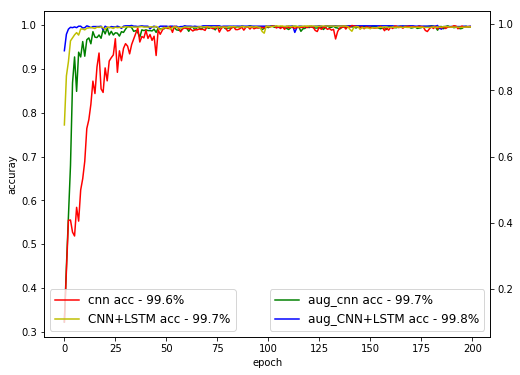

In [62]:
fig, loss_ax = plt.subplots(figsize=(8,6))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_1.history['val_acc'], 'g', label='aug_cnn acc - 99.7%')
loss_ax.plot(hist_2.history['val_acc'], 'b', label='aug_CNN+LSTM acc - 99.8%')
#loss_ax.plot(hist_3.history['val_acc'], 'b', label='aug_LSTM acc')

acc_ax.plot(hist_1_.history['val_acc'], 'r', label='cnn acc - 99.6%')
acc_ax.plot(hist_2_.history['val_acc'], 'y', label='CNN+LSTM acc - 99.7%')
#acc_ax.plot(hist_3_.history['val_acc'], 'k', label='LSTM acc')



loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuray')


acc_ax.legend(loc='lower left',fontsize='large')
loss_ax.legend(loc='lower right',fontsize='large')
plt.savefig('accuracy_2')
plt.show()


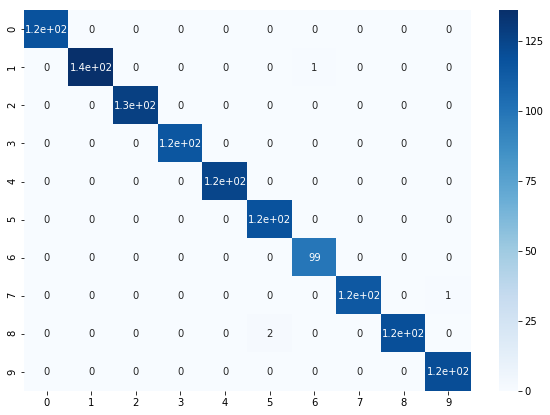

In [67]:
cm = confusion_matrix(true_value, predict_value)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap=plt.cm.Blues)
plt.savefig('confusion_matrix_.png')

0.9966666666666667
0.9958333333333333
0.9975
0.9983333333333333


In [68]:
print(list_)

[275, 298, 503, 707]


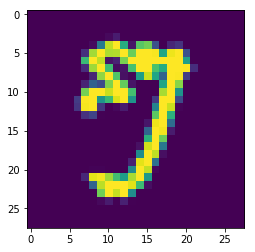

In [74]:
plt.imshow(X_test_img[503].reshape((28,28)))